In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import glob
import plotly.graph_objects as go


In [2]:
training_curves = glob.glob('./results/*/*csv')+glob.glob('./results-coords/*/*csv')
#training_curves2 = glob.glob('./results-MinMax-Schedule/*/*csv')

In [3]:
dfs = {}
res = {}
for curve in training_curves:#+training_curves2:
    name = curve.split('/')[2]
    f = pd.read_csv(curve).drop('epoch', axis = 1)
    f.index.name = 'epoch'
    dfs[name] = f.reset_index()#.tail(10000)
    res[name] = f.loc[f.val_loss.idxmin()].copy()
    #print(name ,f.val_loss.idxmin())
    res[name]['bst_epoch'] = f.val_loss.idxmin()
    res[name]['max_epoch'] = f.shape[0]

In [4]:
df = pd.DataFrame(res).T.sort_values(by = 'val_loss')


In [5]:
pal = sns.color_palette("Paired")


In [6]:
df_tmp1 = df.loc[[x for x in df.index if 'paths-exp4-coords2' in x]] #in x or 'paths-exp6-coords4' in x]]
df_tmp2 = df.loc[[x for x in df.index if 'paths-exp6-coords4' in x]] #in x or 'paths-exp6-coords4' in x]]

In [7]:
pal

[(0.6509803921568628, 0.807843137254902, 0.8901960784313725),
 (0.12156862745098039, 0.47058823529411764, 0.7058823529411765),
 (0.6980392156862745, 0.8745098039215686, 0.5411764705882353),
 (0.2, 0.6274509803921569, 0.17254901960784313),
 (0.984313725490196, 0.6039215686274509, 0.6),
 (0.8901960784313725, 0.10196078431372549, 0.10980392156862745),
 (0.9921568627450981, 0.7490196078431373, 0.43529411764705883),
 (1.0, 0.4980392156862745, 0.0),
 (0.792156862745098, 0.6980392156862745, 0.8392156862745098),
 (0.41568627450980394, 0.23921568627450981, 0.6039215686274509),
 (1.0, 1.0, 0.6),
 (0.6941176470588235, 0.34901960784313724, 0.1568627450980392)]

Index(['coords--64_128_128tanh', 'coords--16_32tanh'], dtype='object')

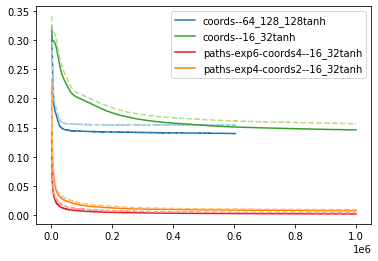

In [20]:
fig, axs = plt.subplots(ncols = 1, nrows = 1)

models_to_plot = ['coords--64_128_128tanh', 'coords--16_32tanh', 'paths-exp6-coords4--16_32tanh', 'paths-exp4-coords2--16_32tanh']#, 'coords--16_32tanh']#, 'cycles-exp4-coords4--16_32tanh']

rolling = [True, 1000]

k = 0
for i in models_to_plot:
    df_loss = dfs[i]['loss'].copy()
    df_val_loss = dfs[i]['val_loss'].copy()
    if rolling[0]:
        df_loss = df_loss.rolling(rolling[1]).mean().dropna()
        df_val_loss = df_val_loss.rolling(rolling[1]).mean().dropna()

    axs.plot(df_loss,color = pal[k+1], label = i)
    axs.plot(df_val_loss,color = pal[k], linestyle = '--')
    k = k + 2

#plt.ylim([0.0, 0.1])
#plt.xlim([0, 100_000])

axs.legend()
fig.show()

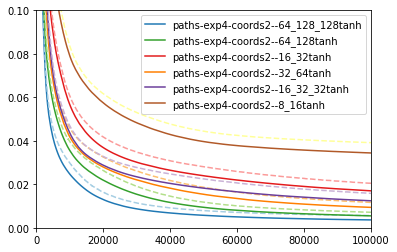

In [8]:
fig, axs = plt.subplots(ncols = 1, nrows = 1)

models_to_plot = df_tmp1.index #['paths-exp6-coords4--16_32tanh', 'paths-exp4-coords2--16_32tanh', 'coords--16_32tanh']#, 'cycles-exp4-coords4--16_32tanh']

rolling = [True, 1000]

k = 0
for i in models_to_plot:
    df_loss = dfs[i]['loss'].copy()
    df_val_loss = dfs[i]['val_loss'].copy()
    if rolling[0]:
        df_loss = df_loss.rolling(rolling[1]).mean().dropna()
        df_val_loss = df_val_loss.rolling(rolling[1]).mean().dropna()

    axs.plot(df_loss,color = pal[k+1], label = i)
    axs.plot(df_val_loss,color = pal[k], linestyle = '--')
    k = k + 2

plt.ylim([0.0, 0.1])
plt.xlim([0, 100_000])

axs.legend()
fig.show()

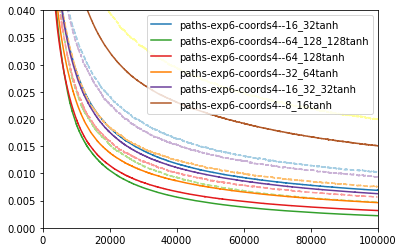

In [9]:
fig, axs = plt.subplots(ncols = 1, nrows = 1)

models_to_plot = df_tmp2.index #['paths-exp6-coords4--16_32tanh', 'paths-exp4-coords2--16_32tanh', 'coords--16_32tanh']#, 'cycles-exp4-coords4--16_32tanh']

rolling = [True, 1000]

k = 0
for i in models_to_plot:
    df_loss = dfs[i]['loss'].copy()
    df_val_loss = dfs[i]['val_loss'].copy()
    if rolling[0]:
        df_loss = df_loss.rolling(rolling[1]).mean().dropna()
        df_val_loss = df_val_loss.rolling(rolling[1]).mean().dropna()

    axs.plot(df_loss,color = pal[k+1], label = i)
    axs.plot(df_val_loss,color = pal[k], linestyle = '--')
    k = k + 2

plt.ylim([0.0, 0.04])
plt.xlim([0, 100_000])

axs.legend()
fig.show()